In [1]:
import pandas as pd
import json
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from Train_Model import preprocessing, pancreatic_cancer_f1
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import shap

In [2]:
with open('/home/ofeksh2@mta.ac.il/config_files/config.json') as f:
    config = json.load(f)

In [3]:
test_group_df = pd.read_csv(config['test_path'], low_memory=False)
test_group_df

,31-0.0,34-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,1080-0.0,...,23417-0.0,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label
0,1,1946,15.0,3.0,30.0,1.0,60.0,NaN,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"E669, E785, F171, I088, I211, I251, I252, I253...",0
1,0,1939,40.0,7.0,20.0,1.0,60.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A099, A410, C504, C509, D059, D231, D649, D70,...",0
2,0,1961,35.0,3.0,25.0,3.0,50.0,NaN,1.0,-10.0,...,1.2068,1.44710,0.15791,0.47627,0.38350,0.80533,0.59421,0.21112,"J342, J348, J350, -1, -1, -1, -1, -1, -1, -1, ...",0
3,1,1946,400.0,7.0,180.0,1.0,10.0,NaN,3.0,0.0,...,1.1545,1.15650,0.21963,0.44549,0.32030,0.86462,0.66119,0.20343,"C187, C772, I10, K529, K566, K573, K624, R42, ...",0
4,0,1941,30.0,3.0,120.0,4.0,60.0,NaN,5.0,1.0,...,1.5812,1.61940,0.20709,0.63572,0.45561,1.08880,0.80894,0.27986,"I951, R55, -1, -1, -1, -1, -1, -1, -1, -1, -1,...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100804,0,1941,-1.0,7.0,-1.0,1.0,10.0,NaN,3.0,-10.0,...,2.1511,0.82668,0.64487,0.69013,0.29044,1.12950,0.84621,0.28331,"D259, E780, H250, H258, I10, L988, M199, M511,...",0
100805,0,1953,40.0,2.0,60.0,1.0,10.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"G560, H251, H268, H521, M139, M549, N840, Z833...",0
100806,0,1956,60.0,0.0,NaN,0.0,NaN,NaN,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1...",0
100807,0,1949,-1.0,3.0,-1.0,1.0,-1.0,NaN,4.0,0.0,...,1.4105,1.21770,0.29014,0.54136,0.32822,0.98879,0.71712,0.27167,"C504, C509, I10, M1994, N840, N950, R224, Z922...",0


In [3]:
train_group_df = pd.read_csv(config['train_path'], low_memory=False)
train_group_df

,31-0.0,34-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,1080-0.0,...,23417-0.0,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label
0,1,1960,90.0,5.0,90.0,6.0,90.0,NaN,2.0,-10.0,...,1.3988,0.93029,0.20435,0.54061,0.22548,0.77313,0.56444,0.20869,"Z302, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, ...",0
1,1,1952,30.0,3.0,60.0,1.0,120.0,NaN,2.0,1.0,...,1.5409,0.91218,0.33981,0.57246,0.24877,0.95285,0.70219,0.25065,"H110, N423, -1, -1, -1, -1, -1, -1, -1, -1, -1...",0
2,0,1951,15.0,4.0,30.0,4.0,10.0,NaN,2.0,-10.0,...,1.5138,1.14960,0.34404,0.56801,0.31758,1.07570,0.79294,0.28279,"A099, A419, C504, C509, C770, C771, C772, C773...",0
3,1,1943,20.0,1.0,30.0,0.0,NaN,NaN,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"B961, C443, C446, C97, E119, E669, E780, F171,...",2
4,0,1945,-1.0,-1.0,NaN,-1.0,NaN,NaN,4.0,0.0,...,1.4519,0.92830,0.37180,0.52728,0.26773,0.88373,0.63536,0.24836,"A099, D125, I10, I849, K210, K219, K29, K514, ...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72675,1,1957,10.0,2.0,10.0,3.0,10.0,NaN,3.0,1.0,...,1.1170,1.25320,0.21467,0.41503,0.36378,0.91329,0.70299,0.21030,"A09, D481, E119, E780, I10, I639, L721, Z867, ...",2
72676,1,1950,20.0,1.0,0.0,1.0,0.0,NaN,3.0,1.0,...,1.6451,1.14880,0.39226,0.57804,0.29451,0.94568,0.70211,0.24357,"D120, F329, I10, K573, K590, K621, K635, R11, ...",0
72677,0,1951,45.0,0.0,NaN,0.0,NaN,NaN,4.0,-10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"E119, E780, I10, K580, R194, R55, Z538, -1, -1...",2
72678,0,1954,10.0,0.0,NaN,1.0,90.0,NaN,1.0,1.0,...,1.6373,1.03760,0.38707,0.57316,0.30751,0.99229,0.74693,0.24536,"D122, F329, F419, G551, H269, J181, K219, K573...",0


In [6]:
total_people_in_train = train_group_df.shape[0]
people_with_pancreatic_cancer_in_train = train_group_df[train_group_df['Label'] == 1].shape[0]
people_with_diabetes_in_train = train_group_df[train_group_df['Label'] == 2].shape[0]
total_people_in_test = test_group_df.shape[0]
people_with_pancreatic_cancer_in_test = test_group_df[test_group_df['Label'] == 1].shape[0]
people_with_diabetes_in_test = test_group_df[test_group_df['Label'] == 2].shape[0]
print(f'Total people in train: {total_people_in_train}')
print(f'Number of people with diabetes in train: {people_with_diabetes_in_train}')
print(f'Number of people with pancreatic cancer in train: {people_with_pancreatic_cancer_in_train}')
print(f'Total people in test: {total_people_in_test}')
print(f'Number of people with diabetes in test: {people_with_diabetes_in_test}')
print(f'Number of people with pancreatic cancer in test: {people_with_pancreatic_cancer_in_test}')

Total people in train: 72680
Number of people with diabetes in train: 34384
Number of people with pancreatic cancer in train: 1580
Total people in test: 100809
Number of people with diabetes in test: 8719
Number of people with pancreatic cancer in test: 393


In [11]:
train_group_df

,eid,34-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,1080-0.0,...,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label,31-0.0
0,1000114,1943,20.0,1.0,30.0,0.0,NaN,NaN,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"B961, C443, C446, C97, E119, E669, E780, F171,...",2,1
1,1000140,1946,60.0,7.0,60.0,3.0,60.0,7.0,2.0,0.0,...,1.28990,0.33778,0.67375,0.36829,1.20690,0.87740,0.32952,"H502, H509, I678, K20, K219, K297, M1397, M204...",0,0
2,1000179,1945,-1.0,-1.0,NaN,-1.0,NaN,NaN,4.0,0.0,...,0.92830,0.37180,0.52728,0.26773,0.88373,0.63536,0.24836,"A099, D125, I10, I849, K210, K219, K29, K514, ...",0,0
3,1000188,1942,120.0,3.0,60.0,2.0,30.0,NaN,3.0,0.0,...,0.81039,0.40859,0.54697,0.25601,0.96305,0.70071,0.26234,"C712, C719, G939, I10, R55, R568, S4220, Z515,...",0,0
4,1000290,1948,20.0,7.0,120.0,0.0,NaN,NaN,6.0,-10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"B99, D352, E119, E220, E272, E274, E559, E780,...",2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72626,6023789,1954,10.0,0.0,NaN,1.0,90.0,NaN,1.0,1.0,...,1.03760,0.38707,0.57316,0.30751,0.99229,0.74693,0.24536,"D122, F329, F419, G551, H269, J181, K219, K573...",0,0
72627,6023908,1955,30.0,2.0,60.0,1.0,90.0,NaN,0.0,5.0,...,1.18760,0.17385,0.38832,0.32677,0.74535,0.53990,0.20544,"G470, N950, R32, R413, R55, R568, R930, S001, ...",0,0
72628,6023915,1942,10.0,0.0,NaN,0.0,NaN,NaN,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A419, C61, D180, F329, H269, I252, I48, I501, ...",0,1
72629,6023953,1943,-1.0,7.0,180.0,0.0,NaN,NaN,3.0,0.0,...,0.96115,0.26585,0.48092,0.25935,0.88640,0.64831,0.23808,"C320, E780, F171, H209, H251, I10, J383, R31, ...",0,1


In [12]:
test_group_df

,eid,34-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,1080-0.0,...,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label,31-0.0
0,1000048,1939.0,40.0,7.0,20.0,1.0,60.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A099, A410, C504, C509, D059, D231, D649, D70,...",0,0
1,1000123,1944.0,30.0,0.0,NaN,0.0,NaN,NaN,4.0,-10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"I959, M169, R33, Z966, -1, -1, -1, -1, -1, -1,...",0,0
2,1000131,1955.0,NaN,0.0,NaN,0.0,NaN,NaN,4.0,2.0,...,1.21170,0.28261,0.47817,0.35985,0.93282,0.68476,0.24806,"G439, J22, K449, M0590, M0599, M061, M0690, M0...",0,0
3,1000219,1962.0,15.0,0.0,NaN,0.0,NaN,NaN,2.0,-10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"H269, I841, I844, I846, K011, K564, N133, N328...",0,0
4,1000238,1950.0,20.0,1.0,20.0,0.0,NaN,NaN,3.0,-10.0,...,0.92425,0.35168,0.63930,0.26301,0.99419,0.72942,0.26477,"B349, D123, D124, I211, I251, I252, K573, K579...",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100761,6023700,1958.0,30.0,2.0,10.0,1.0,-1.0,NaN,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"E876, F101, F102, F103, F106, F329, G312, I679...",0,0
100762,6023778,1950.0,60.0,1.0,20.0,0.0,NaN,NaN,3.0,1.0,...,1.08950,0.20816,0.43119,0.27740,0.76184,0.56804,0.19380,"-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1...",0,1
100763,6023994,1965.0,20.0,7.0,30.0,3.0,20.0,NaN,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"E669, I10, K219, M179, M2323, M2331, M2333, T1...",0,1
100764,6024004,1960.0,30.0,3.0,300.0,2.0,120.0,4.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"C211, C772, J352, K529, K590, K626, K628, K635...",0,1


In [13]:
train_group_df.to_csv(config['train_path'], index=False)
test_group_df.to_csv(config['test_path'], index=False)

In [41]:
feature_col = train_group_df[train_group_df['Label'] != 0]['30510-0.0']
label_col = train_group_df[train_group_df['Label'] != 0]['Label']

/tmp/ipykernel_221552/3786909553.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=label_col)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

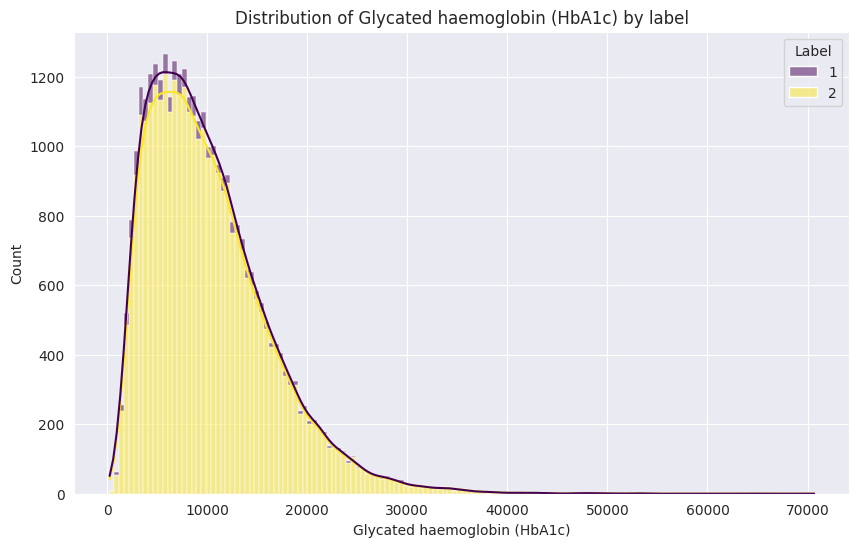

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_group_df, x=feature_col, hue=label_col, multiple="stack", palette="viridis", kde=True)
plt.title(f'Distribution of Glycated haemoglobin (HbA1c) by label')
plt.xlabel('Glycated haemoglobin (HbA1c)')
plt.ylabel('Count')
plt.legend(title=label_col)
plt.show()

In [ ]:
diseases_patterns = [
    ('Diabetes', r'E11'),
    ('Pancreatic Cancer', r'C25'),
    ('Obesity', r'E66'),
    ('Acute Pancreatitis', r'K85'),
    ('Alcoholic Liver Disease', r'K70'),
    ('Cirrhosis', r'K74'),
    ('Acute Hepatitis A', r'B15'),
    ('Acute Hepatitis B', r'B16'),
    ('Acute Hepatitis C', r'B171'),
    ('Toxic Liver Disease', r'K71'),
    ('Cushings Syndrome', r'E24'),
    ('Hyperthyroidism', r'E05'),
    ('Intestinal Malabsorption', r'K90'),
    ('Arterial Embolism and Thrombosis', r'I74')
]

patient_diseases = train_df['Diagnoses']
for disease, disease_pattern in diseases_patterns[2:]:
    train_df[f'Has {disease}'] = classify_disease(patient_diseases, disease_pattern)

train_df = train_df.drop(columns=['Diagnoses'])
train_df = train_df.drop(columns=[f'Diagnoses - ICD10 - {i}' for i in range(100)])

father_diagnosis_codes = [f'Illnesses of father - {i}' for i in range(10)]
mother_diagnosis_codes = [f'Illnesses of mother - {i}' for i in range(11)]
siblings_diagnosis_codes = [f'Illnesses of siblings - {i}' for i in range(12)]

father_diseases = train_df[father_diagnosis_codes].astype(str).agg(', '.join, axis=1)
mother_diseases = train_df[mother_diagnosis_codes].astype(str).agg(', '.join, axis=1)
siblings_diseases = train_df[siblings_diagnosis_codes].astype(str).agg(', '.join, axis=1)

for disease, disease_pattern in diseases_patterns:
    train_df[f'Father has {disease}'] = classify_disease(father_diseases, disease_pattern)
for disease, disease_pattern in diseases_patterns:
    train_df[f'Mother has {disease}'] = classify_disease(mother_diseases, disease_pattern)
for disease, disease_pattern in diseases_patterns:
    train_df[f'Siblings have {disease}'] = classify_disease(siblings_diseases, disease_pattern)

train_df = train_df.drop(columns=(father_diagnosis_codes + mother_diagnosis_codes + siblings_diagnosis_codes))

# Evaluation

In [4]:
processed_df = preprocessing(test_group_df, config, scaled_data=True)

/tmp/pycharm_project_366/Train_Model.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Has {disease}'] = classify_disease(diagnoses, disease_pattern)
/tmp/pycharm_project_366/Train_Model.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Has {disease}'] = classify_disease(diagnoses, disease_pattern)
/tmp/pycharm_project_366/Train_Model.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all column

In [12]:
processed_df

,Sex - 0,Year of birth - 0,Duration of walks - 0,Number of days/week of moderate physical activity 10+ minutes - 0,Duration of moderate activity - 0,Number of days/week of vigorous physical activity 10+ minutes - 0,Duration of vigorous activity - 0,Time spent watching television (TV) - 0,Time spent using computer - 0,Time spent driving - 0,...,Processed meat intake - 0_0.0,Processed meat intake - 0_1.0,Processed meat intake - 0_2.0,Processed meat intake - 0_3.0,Processed meat intake - 0_4.0,Processed meat intake - 0_5.0,Processed meat intake - 0_nan,Antigen assay QC indicator - 0_1.0,Antigen assay QC indicator - 0_2.0,Antigen assay QC indicator - 0_nan
0,1,-0.522610,-0.503532,-0.076041,-0.379712,-0.234327,0.405056,0.756034,0.609113,-1.568564,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,-1.414121,-0.178774,1.460118,-0.510282,-0.234327,0.405056,-0.214640,0.386127,0.375436,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,1.387770,-0.243726,-0.076041,-0.444997,0.727693,0.201992,-0.538198,-2.066715,0.764236,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,-0.522610,4.497734,1.460118,1.578842,-0.234327,-0.610264,0.108918,0.163142,0.958636,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,-1.159404,-0.308677,-0.076041,0.795420,1.208703,0.405056,0.756034,0.386127,0.569836,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100804,0,-1.159404,-0.711377,1.460118,-0.784480,-0.234327,-0.610264,0.108918,-2.066715,0.569836,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
100805,0,0.368900,-0.178774,-0.460080,0.011999,-0.234327,-0.610264,-0.214640,0.386127,-1.568564,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
100806,0,0.750976,0.081032,-1.228159,0.000000,-0.715337,0.000000,-0.214640,0.609113,-1.568564,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
100807,0,-0.140534,-0.711377,-0.076041,-0.784480,-0.234327,-0.833635,0.432476,0.163142,-1.568564,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
y_test = processed_df['Label']
x_test = processed_df.drop(columns=['Label'])

In [26]:
RF_model = pickle.load(open(f"{config['models_path']}/RF.pkl", 'rb'))
GB_model = pickle.load(open(f"{config['models_path']}/GB.pkl", 'rb'))
MLP_model = pickle.load(open(f"{config['models_path']}/MLP.pkl", 'rb'))

In [7]:
RF_model_with_weighted_labels = pickle.load(open(f"{config['models_path']}/RF_with_weighted_labels.pkl", 'rb'))
GB_model_with_weighted_labels = pickle.load(open(f"{config['models_path']}/GB_with_weighted_labels.pkl", 'rb'))
MLP_model_with_weighted_labels = pickle.load(open(f"{config['models_path']}/MLP_with_weighted_labels.pkl", 'rb'))

In [7]:
RF_model_scaled = pickle.load(open(f"{config['models_path']}/RF_scaled.pkl", 'rb'))
GB_model_scaled = pickle.load(open(f"{config['models_path']}/GB_scaled.pkl", 'rb'))
MLP_model_scaled = pickle.load(open(f"{config['models_path']}/MLP_scaled.pkl", 'rb'))

In [6]:
RF_model_cancer_healthy_scaled = pickle.load(open(f"{config['models_path']}/cancer_healthy_RF_scaled.pkl", 'rb'))
GB_model_cancer_healthy_scaled = pickle.load(open(f"{config['models_path']}/cancer_healthy_GB_scaled.pkl", 'rb'))
MLP_model_cancer_healthy_scaled = pickle.load(open(f"{config['models_path']}/cancer_healthy_MLP_scaled.pkl", 'rb'))
RF_model_T2D_healthy_scaled = pickle.load(open(f"{config['models_path']}/T2D_healthy_RF_scaled.pkl", 'rb'))
GB_model_T2D_healthy_scaled = pickle.load(open(f"{config['models_path']}/T2D_healthy_GB_scaled.pkl", 'rb'))
MLP_model_T2D_healthy_scaled = pickle.load(open(f"{config['models_path']}/T2D_healthy_MLP_scaled.pkl", 'rb'))
RF_model_cancer_T2D_scaled = pickle.load(open(f"{config['models_path']}/cancer_T2D_RF_scaled.pkl", 'rb'))
GB_model_cancer_T2D_scaled = pickle.load(open(f"{config['models_path']}/cancer_T2D_GB_scaled.pkl", 'rb'))
MLP_model_cancer_T2D_scaled = pickle.load(open(f"{config['models_path']}/cancer_T2D_MLP_scaled.pkl", 'rb'))

In [6]:
RF_scaled_healthy_vs_sick = pickle.load(open(f"{config['models_path']}/RF_scaled_healthy_vs_sick.pkl", 'rb'))
GB_scaled_healthy_vs_sick = pickle.load(open(f"{config['models_path']}/GB_scaled_healthy_vs_sick.pkl", 'rb'))
MLP_scaled_healthy_vs_sick = pickle.load(open(f"{config['models_path']}/MLP_scaled_healthy_vs_sick.pkl", 'rb'))

In [9]:
RF_scaled_t2d_vs_cancer = pickle.load(open(f"{config['models_path']}/RF_scaled_t2d_vs_cancer.pkl", 'rb'))
GB_scaled_t2d_vs_cancer = pickle.load(open(f"{config['models_path']}/GB_scaled_t2d_vs_cancer.pkl", 'rb'))
MLP_scaled_t2d_vs_cancer = pickle.load(open(f"{config['models_path']}/MLP_scaled_t2d_vs_cancer.pkl", 'rb'))

In [7]:
RF_scaled_cancer_vs_rest = pickle.load(open(f"{config['models_path']}/RF_scaled_cancer_vs_rest.pkl", 'rb'))
GB_scaled_cancer_vs_rest = pickle.load(open(f"{config['models_path']}/RF_scaled_cancer_vs_rest.pkl", 'rb'))
MLP_scaled_cancer_vs_rest = pickle.load(open(f"{config['models_path']}/RF_scaled_cancer_vs_rest.pkl", 'rb'))

In [6]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(confusion_mat)
    print(classification_report(y_test, y_pred))

In [12]:
evaluate_model(RF_model, x_test, y_test)

[[73522     0 18175]
 [  235     0   158]
 [ 1918     0  6801]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     91697
           1       0.00      0.00      0.00       393
           2       0.27      0.78      0.40      8719

    accuracy                           0.80    100809
   macro avg       0.41      0.53      0.43    100809
weighted avg       0.91      0.80      0.83    100809


/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [13]:
evaluate_model(GB_model, x_test, y_test)

[[72889   867 17941]
 [  223     7   163]
 [ 1949   104  6666]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     91697
           1       0.01      0.02      0.01       393
           2       0.27      0.76      0.40      8719

    accuracy                           0.79    100809
   macro avg       0.42      0.53      0.43    100809
weighted avg       0.91      0.79      0.83    100809


In [14]:
evaluate_model(MLP_model, x_test, y_test)

[[56770     0 34927]
 [  255     0   138]
 [ 6503     0  2216]]
              precision    recall  f1-score   support

           0       0.89      0.62      0.73     91697
           1       0.00      0.00      0.00       393
           2       0.06      0.25      0.10      8719

    accuracy                           0.59    100809
   macro avg       0.32      0.29      0.28    100809
weighted avg       0.82      0.59      0.67    100809


/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [10]:
importances = RF_model.feature_importances_
feature_names = test_group_df.drop(columns=['Label']).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
#importance_df[importance_df['Importance'] <= 0.0001 ]
importance_df

,Feature,Importance
104,Glucose - 0,0.141028
12,Body mass index (BMI) - 0,0.092508
99,Cholesterol - 0,0.062771
107,LDL direct - 0,0.052617
105,HDL cholesterol - 0,0.049588
...,...,...
129,"Persistent or recurrent tiredness, weariness o...",0.000000
228,Antigen assay QC indicator - 0_nan,0.000000
194,Alcohol intake frequency - 0_-3.0,0.000000
201,Alcohol intake frequency - 0_nan,0.000000


In [11]:
importances = GB_model.feature_importances_
feature_names = test_group_df.drop(columns=['Label']).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
104,Glucose - 0,0.255777
102,Cystatin C - 0,0.068839
12,Body mass index (BMI) - 0,0.049184
11,Age high blood pressure diagnosed - 0,0.047105
99,Cholesterol - 0,0.036793
...,...,...
134,"Tiredness, weariness or fatigue goes away when...",0.000000
193,Duration of strenuous sports - 0_nan,0.000000
133,"Persistent or recurrent tiredness, weariness o...",0.000000
201,Alcohol intake frequency - 0_nan,0.000000


In [12]:
importances = GB_model_with_weighted_labels.feature_importances_
feature_names = test_group_df.drop(columns=['Label']).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
104,Glucose - 0,0.213162
12,Body mass index (BMI) - 0,0.155850
1,Year of birth - 0,0.119900
99,Cholesterol - 0,0.060181
103,Gamma glutamyltransferase - 0,0.032658
...,...,...
129,"Persistent or recurrent tiredness, weariness o...",0.000000
130,"Persistent or recurrent tiredness, weariness o...",0.000000
131,"Persistent or recurrent tiredness, weariness o...",0.000000
132,"Persistent or recurrent tiredness, weariness o...",0.000000


In [15]:
evaluate_model(RF_model_with_weighted_labels, x_test, y_test)

[[69440  1477 20780]
 [  211    14   168]
 [ 1707    65  6947]]
              precision    recall  f1-score   support

           0       0.97      0.76      0.85     91697
           1       0.01      0.04      0.01       393
           2       0.25      0.80      0.38      8719

    accuracy                           0.76    100809
   macro avg       0.41      0.53      0.42    100809
weighted avg       0.91      0.76      0.81    100809


In [16]:
evaluate_model(GB_model_with_weighted_labels, x_test, y_test)

[[53107 25394 13196]
 [  108   165   120]
 [ 1023  1524  6172]]
              precision    recall  f1-score   support

           0       0.98      0.58      0.73     91697
           1       0.01      0.42      0.01       393
           2       0.32      0.71      0.44      8719

    accuracy                           0.59    100809
   macro avg       0.43      0.57      0.39    100809
weighted avg       0.92      0.59      0.70    100809


In [8]:
importances = GB_model_with_weighted_labels.feature_importances_
feature_names = test_group_df.drop(columns=['Label']).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
#importance_df[importance_df['Importance'] <= 0.0001 ]
importance_df

,Feature,Importance
104,Glucose - 0,0.213162
12,Body mass index (BMI) - 0,0.155850
1,Year of birth - 0,0.119900
99,Cholesterol - 0,0.060181
103,Gamma glutamyltransferase - 0,0.032658
...,...,...
129,"Persistent or recurrent tiredness, weariness o...",0.000000
130,"Persistent or recurrent tiredness, weariness o...",0.000000
131,"Persistent or recurrent tiredness, weariness o...",0.000000
132,"Persistent or recurrent tiredness, weariness o...",0.000000


In [17]:
evaluate_model(MLP_model_with_weighted_labels, x_test, y_test)

[[70334     0 21363]
 [  297     0    96]
 [ 6173     0  2546]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.83     91697
           1       0.00      0.00      0.00       393
           2       0.11      0.29      0.16      8719

    accuracy                           0.72    100809
   macro avg       0.34      0.35      0.33    100809
weighted avg       0.84      0.72      0.77    100809


/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [12]:
evaluate_model(RF_model_scaled, x_test, y_test)

[[73624     0 18073]
 [  237     0   156]
 [ 1989     0  6730]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     91697
           1       0.00      0.00      0.00       393
           2       0.27      0.77      0.40      8719

    accuracy                           0.80    100809
   macro avg       0.41      0.52      0.43    100809
weighted avg       0.91      0.80      0.83    100809


/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [13]:
evaluate_model(GB_model_scaled, x_test, y_test)

[[73799   522 17376]
 [  227     4   162]
 [ 1933    53  6733]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     91697
           1       0.01      0.01      0.01       393
           2       0.28      0.77      0.41      8719

    accuracy                           0.80    100809
   macro avg       0.42      0.53      0.43    100809
weighted avg       0.91      0.80      0.84    100809


In [14]:
evaluate_model(MLP_model_scaled, x_test, y_test)

[[66964  2244 22489]
 [  228     7   158]
 [ 2292   177  6250]]
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     91697
           1       0.00      0.02      0.00       393
           2       0.22      0.72      0.33      8719

    accuracy                           0.73    100809
   macro avg       0.39      0.49      0.39    100809
weighted avg       0.90      0.73      0.78    100809


In [7]:
test_cancer_healthy = processed_df[processed_df['Label'] != 2]
test_T2D_healthy = processed_df[processed_df['Label'] != 1]
test_cancer_T2D = processed_df[processed_df['Label'] != 0]

In [20]:
x_test = test_cancer_healthy.drop(columns='Label')
y_test = test_cancer_healthy['Label']

In [22]:
evaluate_model(RF_model_cancer_healthy_scaled, x_test, y_test)

[[91697     0]
 [  393     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     91697
           1       0.00      0.00      0.00       393

    accuracy                           1.00     92090
   macro avg       0.50      0.50      0.50     92090
weighted avg       0.99      1.00      0.99     92090


/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [25]:
evaluate_model(GB_model_cancer_healthy_scaled, x_test, y_test)

[[91640    57]
 [  383    10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     91697
           1       0.15      0.03      0.04       393

    accuracy                           1.00     92090
   macro avg       0.57      0.51      0.52     92090
weighted avg       0.99      1.00      0.99     92090


In [26]:
evaluate_model(MLP_model_cancer_healthy_scaled, x_test, y_test)

[[91697     0]
 [  393     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     91697
           1       0.00      0.00      0.00       393

    accuracy                           1.00     92090
   macro avg       0.50      0.50      0.50     92090
weighted avg       0.99      1.00      0.99     92090


/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [27]:
x_test = test_T2D_healthy.drop(columns='Label')
y_test = test_T2D_healthy['Label']

In [28]:
evaluate_model(RF_model_T2D_healthy_scaled, x_test, y_test)

[[73728 17969]
 [ 1804  6915]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     91697
           2       0.28      0.79      0.41      8719

    accuracy                           0.80    100416
   macro avg       0.63      0.80      0.65    100416
weighted avg       0.92      0.80      0.84    100416


In [29]:
evaluate_model(GB_model_T2D_healthy_scaled, x_test, y_test)

[[75103 16594]
 [ 1756  6963]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     91697
           2       0.30      0.80      0.43      8719

    accuracy                           0.82    100416
   macro avg       0.64      0.81      0.66    100416
weighted avg       0.92      0.82      0.85    100416


In [30]:
evaluate_model(MLP_model_T2D_healthy_scaled, x_test, y_test)

[[73561 18136]
 [ 2142  6577]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     91697
           2       0.27      0.75      0.39      8719

    accuracy                           0.80    100416
   macro avg       0.62      0.78      0.64    100416
weighted avg       0.91      0.80      0.84    100416


In [10]:
x_test = test_cancer_T2D.drop(columns='Label')
y_test = test_cancer_T2D['Label']

In [13]:
evaluate_model(RF_model_cancer_T2D_scaled, x_test, y_test)

[[   0  393]
 [   0 8719]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       393
           2       0.96      1.00      0.98      8719

    accuracy                           0.96      9112
   macro avg       0.48      0.50      0.49      9112
weighted avg       0.92      0.96      0.94      9112


/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [14]:
evaluate_model(GB_model_cancer_T2D_scaled, x_test, y_test)

[[  10  383]
 [  15 8704]]
              precision    recall  f1-score   support

           1       0.40      0.03      0.05       393
           2       0.96      1.00      0.98      8719

    accuracy                           0.96      9112
   macro avg       0.68      0.51      0.51      9112
weighted avg       0.93      0.96      0.94      9112


In [15]:
evaluate_model(MLP_model_cancer_T2D_scaled, x_test, y_test)

[[   0  393]
 [   0 8719]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       393
           2       0.96      1.00      0.98      8719

    accuracy                           0.96      9112
   macro avg       0.48      0.50      0.49      9112
weighted avg       0.92      0.96      0.94      9112


/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [8]:
y_test = processed_df['Label']
x_test = processed_df.drop(columns=['Label'])

In [10]:
evaluate_model(RF_scaled_healthy_vs_sick, x_test, y_test)

[[72608 19089]
 [ 1944  7168]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     91697
           1       0.27      0.79      0.41      9112

    accuracy                           0.79    100809
   macro avg       0.62      0.79      0.64    100809
weighted avg       0.91      0.79      0.83    100809


In [11]:
evaluate_model(GB_scaled_healthy_vs_sick, x_test, y_test)

[[73755 17942]
 [ 2114  6998]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     91697
           1       0.28      0.77      0.41      9112

    accuracy                           0.80    100809
   macro avg       0.63      0.79      0.65    100809
weighted avg       0.91      0.80      0.84    100809


In [14]:
evaluate_model(MLP_scaled_healthy_vs_sick, x_test, y_test)

[[91693     4]
 [ 9091    21]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     91697
           1       0.84      0.00      0.00      9112

    accuracy                           0.91    100809
   macro avg       0.87      0.50      0.48    100809
weighted avg       0.90      0.91      0.87    100809


In [13]:
processed_df

,Sex - 0,Year of birth - 0,Duration of walks - 0,Number of days/week of moderate physical activity 10+ minutes - 0,Duration of moderate activity - 0,Number of days/week of vigorous physical activity 10+ minutes - 0,Duration of vigorous activity - 0,Time spent watching television (TV) - 0,Time spent using computer - 0,Time spent driving - 0,...,Processed meat intake - 0_0.0,Processed meat intake - 0_1.0,Processed meat intake - 0_2.0,Processed meat intake - 0_3.0,Processed meat intake - 0_4.0,Processed meat intake - 0_5.0,Processed meat intake - 0_nan,Antigen assay QC indicator - 0_1.0,Antigen assay QC indicator - 0_2.0,Antigen assay QC indicator - 0_nan
1238,1,-0.777328,-0.568484,-1.612199,0.000000,-1.196347,0.000000,0.108918,0.163142,0.375436,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1276,1,0.241542,-0.438580,0.692038,-0.379712,1.689713,-0.610264,0.108918,0.386127,0.569836,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1816,1,-0.395252,0.470741,0.692038,0.403709,0.727693,0.405056,0.108918,0.609113,0.764236,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2041,0,-0.013176,-0.308677,-0.460080,-0.379712,-0.715337,0.000000,-0.538198,0.386127,-1.568564,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3138,0,-0.904686,-0.568484,-0.844120,0.011999,-0.715337,0.000000,0.108918,0.386127,-1.568564,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98873,0,-1.414121,0.340838,-0.076041,0.011999,2.651733,-0.407200,-0.214640,0.163142,-1.568564,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99329,0,-0.522610,-0.568484,-0.844120,-0.379712,-0.715337,0.000000,0.756034,0.386127,-1.568564,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
99805,0,-0.140534,0.081032,1.460118,0.795420,-0.715337,0.000000,-0.538198,0.386127,0.569836,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
100341,0,0.241542,-0.308677,0.307999,-0.379712,-0.715337,0.000000,-0.538198,-2.066715,0.764236,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
processed_df = processed_df[processed_df['Label'] != 0]
processed_df['Label'] = processed_df['Label'].replace(2, 0)

/tmp/ipykernel_152058/2182313345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['Label'] = processed_df['Label'].replace(2, 0)


In [14]:
processed_df

,Sex - 0,Year of birth - 0,Duration of walks - 0,Number of days/week of moderate physical activity 10+ minutes - 0,Duration of moderate activity - 0,Number of days/week of vigorous physical activity 10+ minutes - 0,Duration of vigorous activity - 0,Time spent watching television (TV) - 0,Time spent using computer - 0,Time spent driving - 0,...,Processed meat intake - 0_0.0,Processed meat intake - 0_1.0,Processed meat intake - 0_2.0,Processed meat intake - 0_3.0,Processed meat intake - 0_4.0,Processed meat intake - 0_5.0,Processed meat intake - 0_nan,Antigen assay QC indicator - 0_1.0,Antigen assay QC indicator - 0_2.0,Antigen assay QC indicator - 0_nan
5,0,-0.267893,-0.438580,1.460118,0.795420,-0.715337,0.000000,1.079591,-2.066715,0.375436,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27,0,-1.032045,0.000000,-0.460080,-0.784480,0.727693,-0.833635,-0.538198,-2.066715,-1.568564,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
53,1,-0.395252,0.081032,1.076078,1.578842,-0.715337,0.000000,0.108918,0.386127,0.569836,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
64,1,-0.395252,-0.438580,1.076078,-0.379712,0.246683,-0.407200,0.432476,0.163142,0.375436,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67,1,-1.541480,-0.711377,-1.612199,0.000000,-0.715337,0.000000,-0.214640,0.163142,0.764236,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100779,1,-1.032045,-0.113823,1.460118,0.795420,2.651733,1.623441,-0.861755,0.832099,-1.568564,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
100781,1,-1.286763,-0.568484,-0.844120,-0.640853,-0.234327,-0.833635,0.432476,-2.066715,-1.568564,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
100785,1,-0.140534,-0.503532,1.460118,-0.640853,0.246683,-0.610264,0.108918,0.386127,-1.568564,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
100791,0,-0.777328,-0.438580,0.692038,3.145685,1.689713,1.623441,0.432476,1.055084,0.375436,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
y_test = processed_df['Label']
x_test = processed_df.drop(columns=['Label'])

In [16]:
evaluate_model(RF_scaled_t2d_vs_cancer, x_test, y_test)

[[8719    0]
 [ 393    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8719
           1       0.00      0.00      0.00       393

    accuracy                           0.96      9112
   macro avg       0.48      0.50      0.49      9112
weighted avg       0.92      0.96      0.94      9112


/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [19]:
evaluate_model(GB_scaled_t2d_vs_cancer, x_test, y_test)

[[8681   38]
 [ 369   24]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8719
           1       0.39      0.06      0.11       393

    accuracy                           0.96      9112
   macro avg       0.67      0.53      0.54      9112
weighted avg       0.93      0.96      0.94      9112


In [20]:
evaluate_model(MLP_scaled_t2d_vs_cancer, x_test, y_test)

[[8714    5]
 [ 389    4]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8719
           1       0.44      0.01      0.02       393

    accuracy                           0.96      9112
   macro avg       0.70      0.50      0.50      9112
weighted avg       0.94      0.96      0.94      9112


In [10]:
y_test = processed_df['Label']
x_test = processed_df.drop(columns=['Label'])

In [11]:
y_test = y_test.replace(2, 0)

In [13]:
evaluate_model(RF_scaled_cancer_vs_rest, x_test, y_test)

[[100416      0]
 [   393      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100416
           1       0.00      0.00      0.00       393

    accuracy                           1.00    100809
   macro avg       0.50      0.50      0.50    100809
weighted avg       0.99      1.00      0.99    100809


/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [14]:
evaluate_model(GB_scaled_cancer_vs_rest, x_test, y_test)

[[100416      0]
 [   393      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100416
           1       0.00      0.00      0.00       393

    accuracy                           1.00    100809
   macro avg       0.50      0.50      0.50    100809
weighted avg       0.99      1.00      0.99    100809


/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [15]:
evaluate_model(MLP_scaled_cancer_vs_rest, x_test, y_test)

[[100416      0]
 [   393      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100416
           1       0.00      0.00      0.00       393

    accuracy                           1.00    100809
   macro avg       0.50      0.50      0.50    100809
weighted avg       0.99      1.00      0.99    100809


/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

In [ ]:
def plot_roc_curve(probas, y_test):
    fpr, tpr, thresholds = roc_curve(y_test, probas[:,1])
    roc_auc = roc_auc_score(y_test, probas[:,1])
    
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2,
                 label=f'ROC curve pancreatic cancer (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
    plt.legend(loc='lower right')
    plt.show()
    
    J = tpr - fpr
    best_threshold = thresholds[np.argmax(J)]
    
    return best_threshold

In [35]:
def predict_threshold(probas, threshold):
    predictions = []
    for proba in probas:
        if proba[1] > threshold:
            label = 1
        else:
            label = 0
        predictions.append(label)
    return predictions

In [42]:
probas = GB_scaled_cancer_vs_rest.predict_proba(x_test)

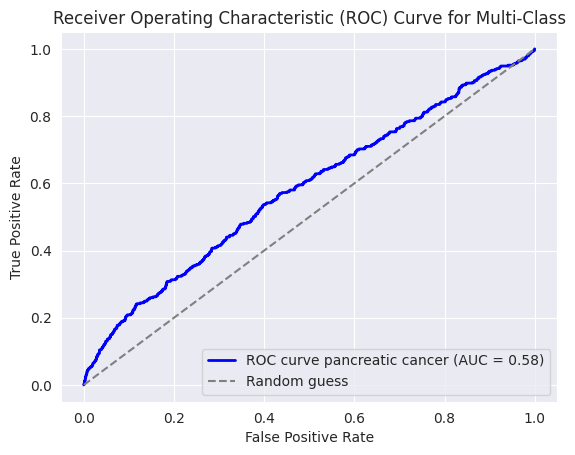

In [43]:
best_threshold = plot_roc_curve(probas, y_test)

In [44]:
y_predictions = predict_threshold(probas, best_threshold)
confusion_mat = confusion_matrix(y_test, y_predictions)
print(confusion_mat)
print(classification_report(y_test, y_predictions))

[[60390 40026]
 [  183   210]]
              precision    recall  f1-score   support

           0       1.00      0.60      0.75    100416
           1       0.01      0.53      0.01       393

    accuracy                           0.60    100809
   macro avg       0.50      0.57      0.38    100809
weighted avg       0.99      0.60      0.75    100809


In [41]:
importances = MLP_scaled_cancer_vs_rest.feature_importances_
feature_names = processed_df.drop(columns=['Label']).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
#importance_df[importance_df['Importance'] <= 0.0001 ]
importance_df

,Feature,Importance
91,Alkaline phosphatase - 0,0.015009
105,Glycated haemoglobin (HbA1c) - 0,0.014967
88,Potassium in urine - 0,0.014754
1,Year of birth - 0,0.014501
87,Creatinine (enzymatic) in urine - 0,0.014371
...,...,...
147,"Tiredness, weariness or fatigue goes away when...",0.000000
206,Duration of strenuous sports - 0_nan,0.000000
229,"Loneliness, isolation - 0_nan",0.000000
224,Tense / 'highly strung' - 0_nan,0.000000


In [5]:
processed_train_df = preprocessing(train_group_df, config, scaled_data=True)

/tmp/pycharm_project_366/Train_Model.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Has {disease}'] = classify_disease(diagnoses, disease_pattern)
/tmp/pycharm_project_366/Train_Model.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Has {disease}'] = classify_disease(diagnoses, disease_pattern)
/tmp/pycharm_project_366/Train_Model.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all column

In [6]:
processed_train_df = processed_train_df[processed_train_df['Label'] != 0]
y_train = processed_train_df['Label']
x_train = processed_train_df.drop(columns=['Label'])
y_train = y_train.replace(2, 0)

In [10]:
explainer = shap.TreeExplainer(GB_scaled_t2d_vs_cancer)

In [11]:
shap_values = explainer(x_train)

In [37]:
shap_values.shape

(35964, 242)

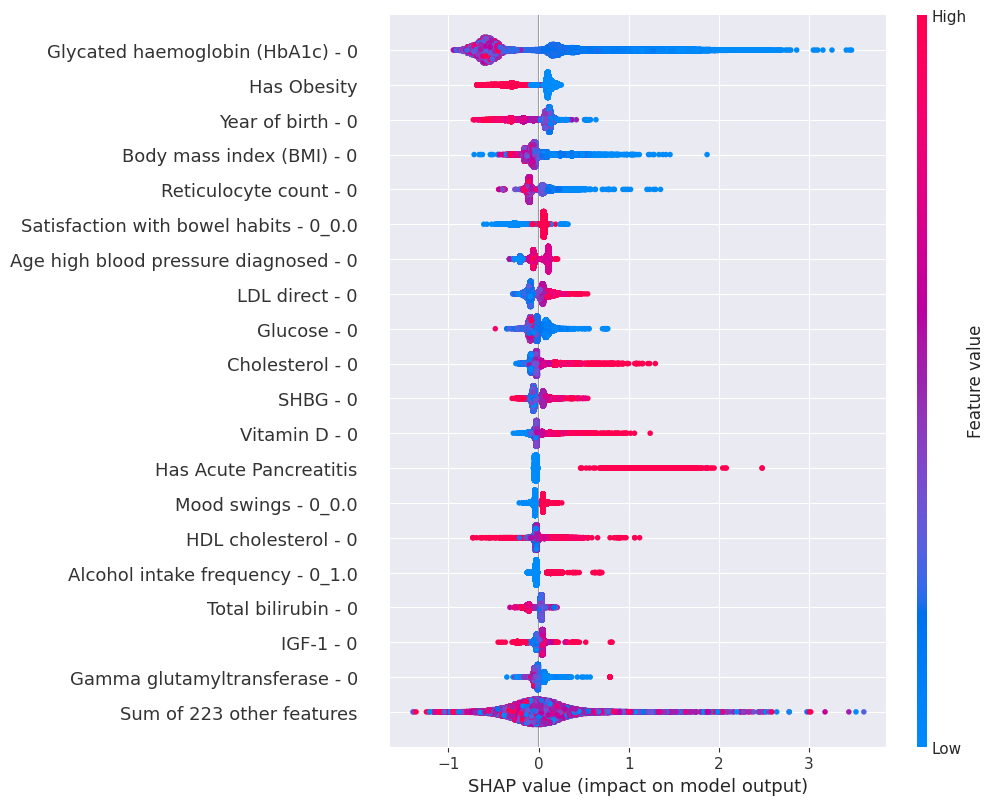

In [12]:
shap.plots.beeswarm(shap_values, max_display=20)

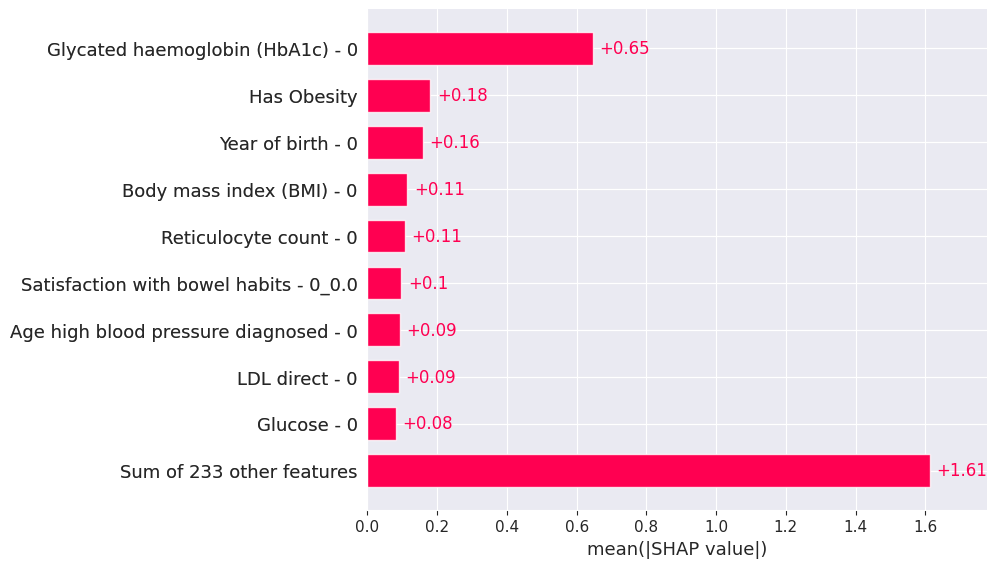

In [13]:
shap.plots.bar(shap_values)

In [25]:
y_train

3        0
7        0
9        0
10       0
11       0
        ..
72671    0
72672    0
72674    0
72675    0
72677    0
Name: Label, Length: 35964, dtype: int64

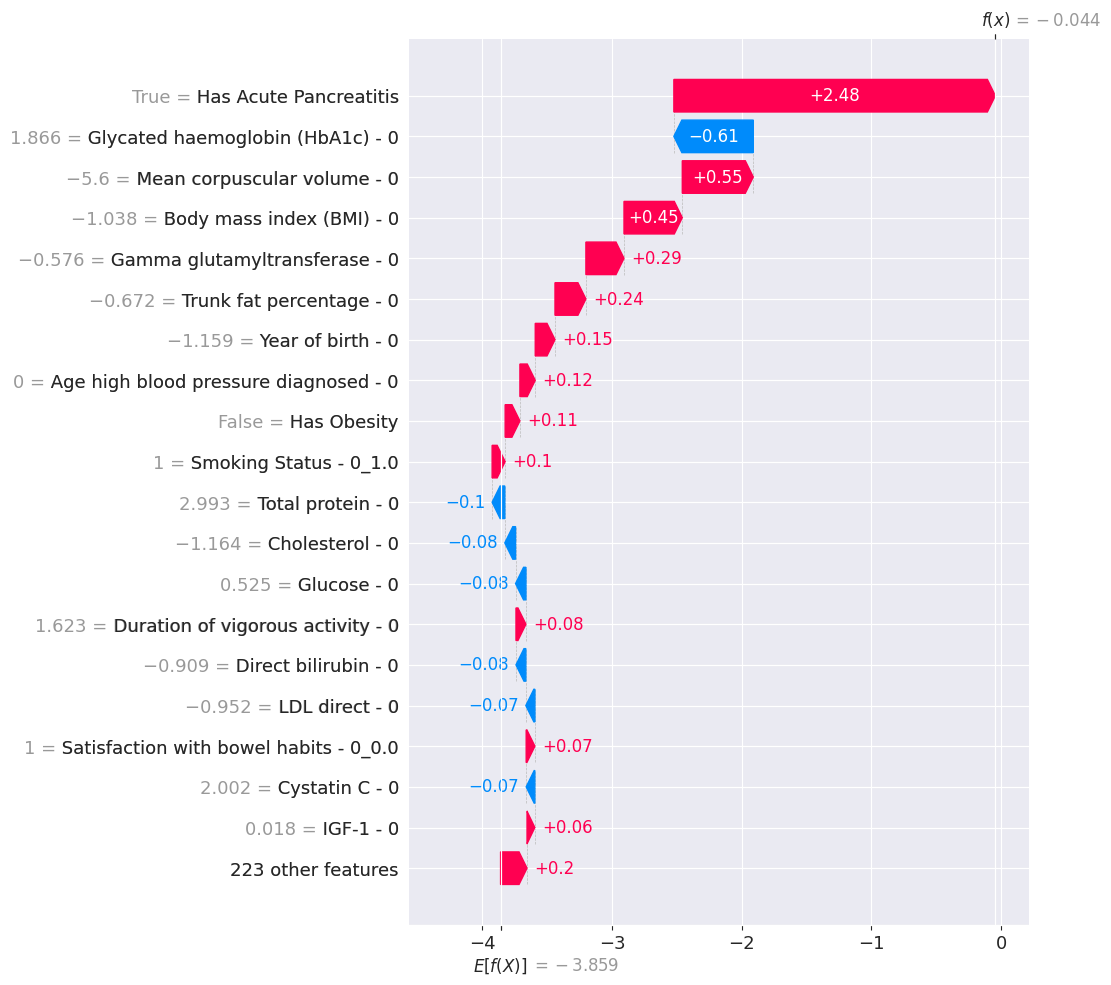

In [26]:
shap.plots.waterfall(shap_values[6], max_display=20)

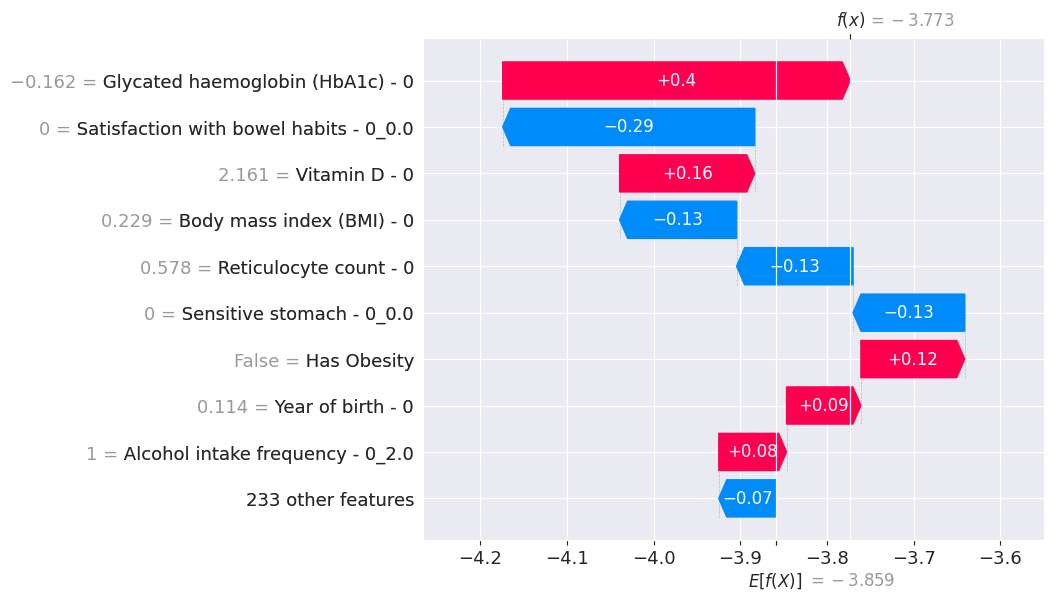

In [20]:
shap.plots.waterfall(shap_values[3])